# Shell History Control

## HOWTO Not Make TAB-UP Mistakes

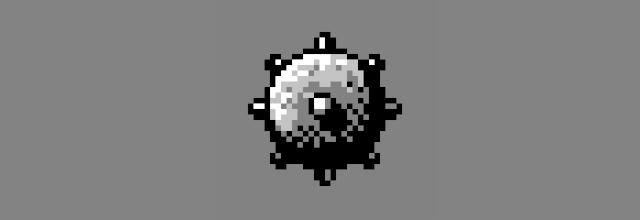

In [3]:
from IPython.display import Image
Image(filename="./mine.png", metadata={"alt": "minesweeper mine", "caption": "I miss [Minesweeper](https://en.wikipedia.org/wiki/Minesweeper_(video_game))."})

Say you execute the following commands in your terminal,^[If you try this yourself, type each line individually. Don't copy and paste the entire block -- it won't work.]

```bash
bash  # Create a new bash session
echo "SECRET_API_TOKEN_1" > /dev/null
 echo "SECRET_API_TOKEN_2" > /dev/null
exit  # Exit it
```

followed by,
```bash
bash
tail -n 3 ~/.bash_history | grep SECRET_API_TOKEN_1 # <= grep_1
tail -n 3 ~/.bash_history | grep SECRET_API_TOKEN_2 # <= grep_2
```

What do you think the output for `grep_1` and `grep_2` would be?

The answer,

```
echo "SECRET_API_TOKEN_1" > /dev/null               # <= grep_1
```

The second `tail|grep` invocation (`grep_2`) doesn't print anything because it fails to find `SECRET_API_TOKEN_2` in your history because *it isn't there*. The extra space before the second
`echo` statement wasn't an accident. `bash` looks at the `HISTCONTROL` environmental variable. If it is set to `ignorespace` (or `ignoreboth`, which also ignores duplicate lines), it won't write any command with a space prefix to the history.^[h/t Yevgeniy Brikman in [Terraform: Up Running: Writing Infrastructure as Code](https://amzn.to/2UnSamw), at least for me.] Or, if you use `zsh` (as you should) make sure to put `setopt HIST_IGNORE_SPACE` in your `.zshrc`.

This is useful. 

Granted, It is not useful in the way I sketched above. **There are probably other good reasons for not putting secrets in command line scripts.** Plus, you have to be sure the space is there, which seems like asking for trouble.

But it *is* useful for TAB-UP mistakes -- those accidents where you press TAB-UP-RETURN too quickly and do something painful. Think `rm -rf .` or an accidental deploy. Your fast-moving developer auto-pilot brain is prone to stepping on old landmines. `HISTCONTROL` disarms them.